In [116]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv(r'C:\Users\Davide\Desktop\movies.csv')

In [117]:
# Looking at the data 

df.head()

pd.set_option('display.max_rows', None)

In [120]:
# Check if there is any missing data

for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(perc_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [121]:
# Dropping missing data

df = df.dropna()

In [122]:
# Check data type for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [123]:
# Change data types of columns 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [124]:
# Create a column only for the release year

df['year'] = df['released'].str.extract('([0-9]{4})').astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [125]:
# Sorting the data by the highest grossing films

df.sort_values(by=['gross'], inplace=True, ascending=False)

In [210]:
# Quick check on every single company without duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
Name: company, dtype: int16

In [92]:
# Let's have a look if the amount of Budget or the Specific company, have an high correlation with the Gross revenue 

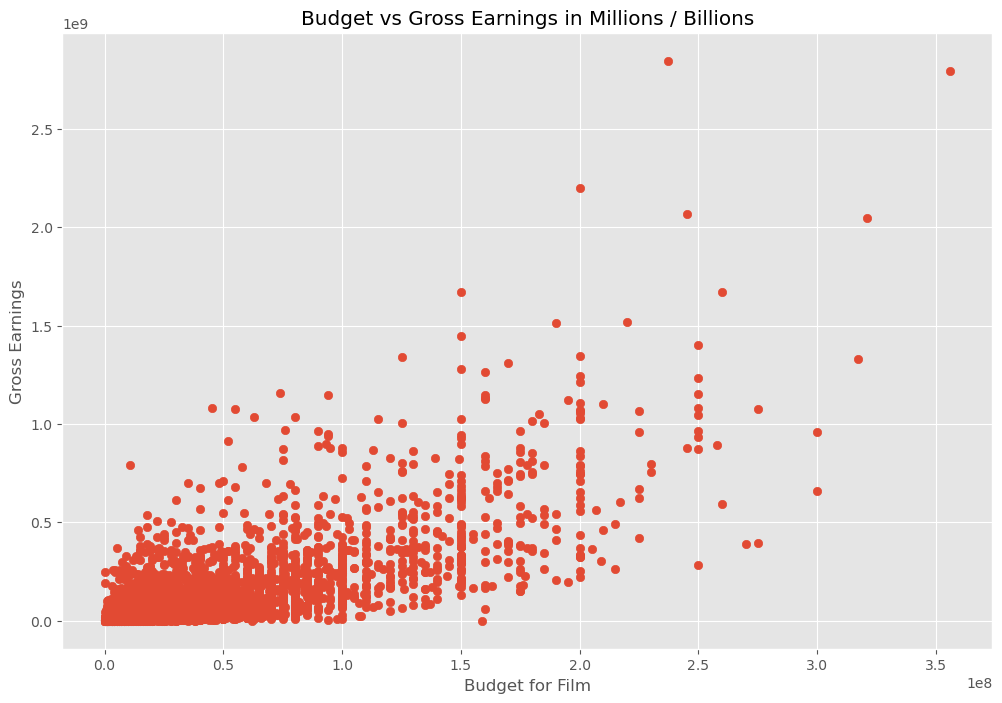

In [132]:
# Looking at Budget
# Scatter plot Budget vs Gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings in Millions / Billions')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [128]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


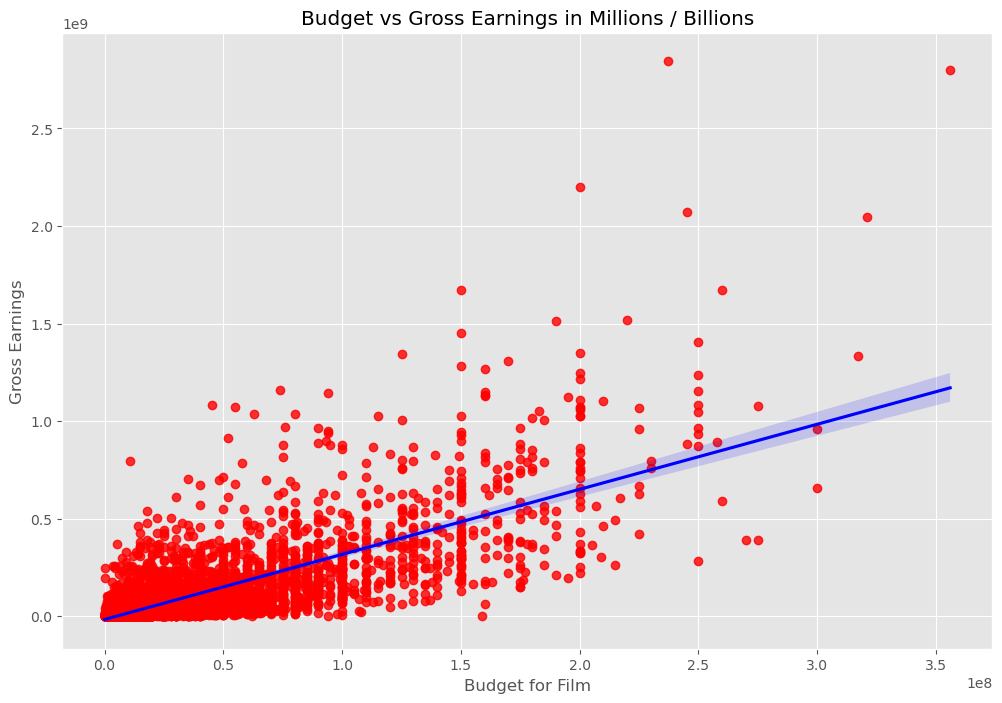

In [188]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x=df['budget'], 
            y=df['gross'], 
            data=df, 
            scatter_kws={'color': 'red'}, 
            line_kws={'color': 'blue'}
           ).set(title='Budget vs Gross Earnings in Millions / Billions')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [183]:
# Looking at the correlation
# pearson / kendall / spearman .7
df.corr(method='pearson').sort_values(by=['budget', 'gross'], ascending=False).style.background_gradient(vmax=1, vmin=0.3)  

,year,score,votes,budget,gross,runtime
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068


In [184]:
# High correlation between Budget and Gross

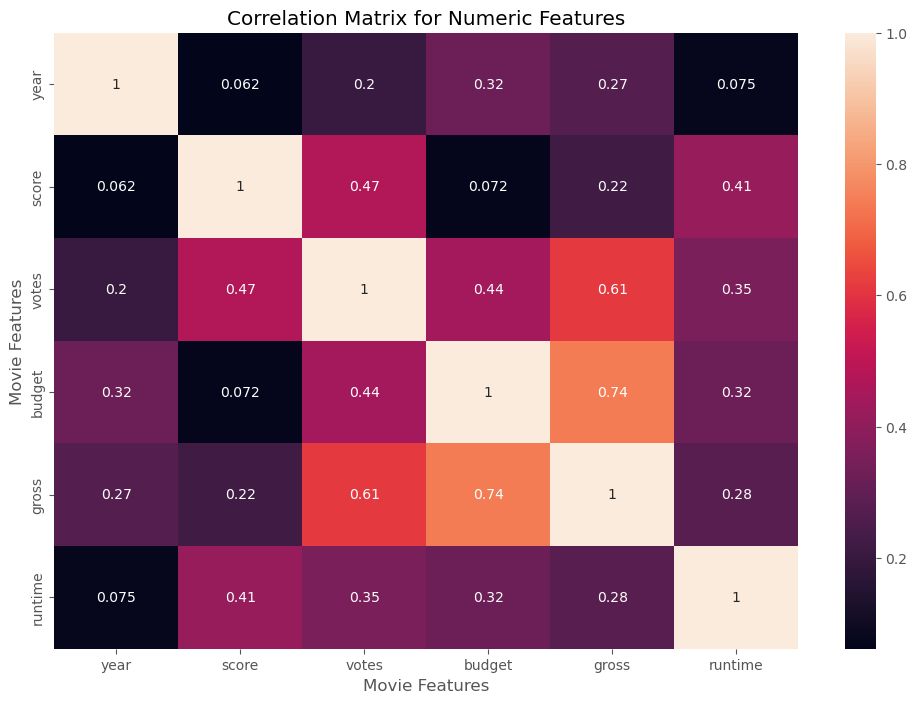

In [189]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [190]:
# High correlation between Budget and Gross

In [211]:
# Looking at Companies

df_numerized = df

for col_name in df_numerized.columns: 
    if (df_numerized[col_name].dtype == 'object'):
            df_numerized[col_name] = df_numerized[col_name].astype('category')
            df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


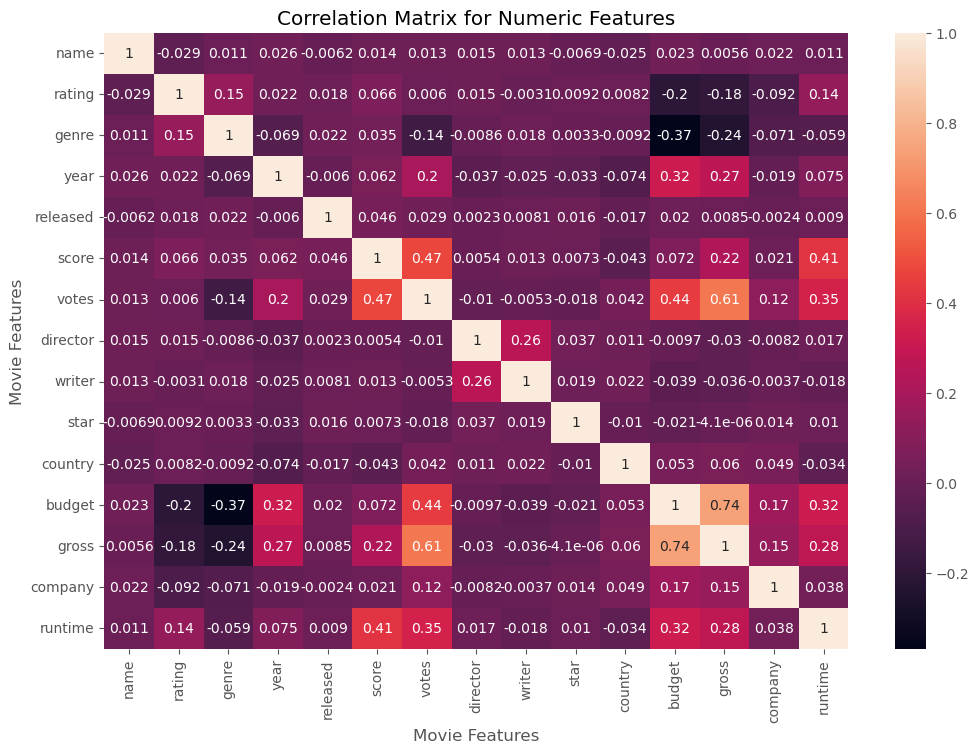

In [192]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [195]:
correlation_matrix = df_numerized.corr().sort_values(by=['company'], ascending=False).style.background_gradient(vmax=1, vmin=0.1)  
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
company,0.021697,-0.092357,-0.071334,-0.018806,-0.002407,0.020656,0.118470,-0.008223,-0.003697,0.014082,0.048569,0.170235,0.149553,1.000000,0.037585
budget,0.023392,-0.203946,-0.368523,0.320312,0.019952,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.052977,1.000000,0.740247,0.170235,0.318695
gross,0.005639,-0.181906,-0.244101,0.268721,0.008501,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.060078,0.740247,1.000000,0.149553,0.275796
votes,0.012615,0.006031,-0.135990,0.203098,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
country,-0.025490,0.008230,-0.009164,-0.073569,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477
runtime,0.010850,0.140792,-0.059237,0.075294,0.008975,0.414068,0.352303,0.017433,-0.017561,0.010108,-0.034477,0.318695,0.275796,0.037585,1.000000
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
score,0.014450,0.065983,0.035106,0.061923,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
star,-0.006882,0.009196,0.003341,-0.032687,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
released,-0.006152,0.018083,0.022142,-0.005989,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975


In [217]:
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()

In [218]:
sorted_pairs = correlation_pairs.sort_values(ascending=False)

In [207]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
dtype: float64

In [208]:
# Votes and Budget have the highest correlation to gross earnings
# Company didn't have an high correlation as expected